# Fashion-MNIST Classification Project

This project aims to build and compare different deep learning models for classifying images from the Fashion-MNIST dataset. We will explore the impact of increasing model complexity, from a simple Artificial Neural Network (ANN) to more sophisticated Convolutional Neural Networks (CNNs), on performance and efficiency.

**Project Agenda & Steps:**

1.  **Dataset Setup:**
    *   Import necessary libraries.
    *   Load the Fashion-MNIST dataset.
    *   Preprocess the data (normalize and reshape images, one-hot encode labels).
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Define the architecture for each model:
        *   Basic ANN Model
        *   Basic CNN Model
        *   Deeper CNN Model

3.  **Model Training:**
    *   Train each model using the prepared training data.
    *   Implement Early Stopping and Model Checkpointing to optimize training and save the best model weights.

4.  **Model Evaluation:**
    *   Load the best weights for each trained model.
    *   Evaluate each model's performance on the test set using metrics like loss and accuracy.
    *   Visualize the training history (accuracy and loss curves) for comparison.
    *   Generate and visualize confusion matrices to understand model performance on each class.

5.  **Prediction Analysis:**
    *   Use the best performing model (Basic CNN in this case) to make predictions on the test set.
    *   Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behavior.

**Goal:** To analyze and demonstrate how model complexity influences classification accuracy and efficiency on the Fashion-MNIST dataset.

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,
         23,  41,  59, 111, 134, 138, 226, 202, 217,  22,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  35, 179,
        195, 182, 225, 198, 241, 177, 199, 205, 210,  26,   0,   1,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19,
          0,   0,   0,   0,   0, 235, 243, 198, 119,   0,   3,   1,   3,
          4,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,   5,   0,   0,   0, 170, 252, 181, 182,   0,   0,   0,   0,
          0,  19],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          1,   0,   0,   4,   0,  76, 255, 183, 219,   9,   0,   0,  42,
        191, 164],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   2,   0,   0, 237, 198, 204,  75,  47, 221, 221,
        238,  25],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   1,   2,   1,   0,   0, 209, 212, 229, 255, 254, 232, 227,
        174,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0, 210, 255,  87, 101, 230, 238,
        105,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   4,   1,   0,   1, 250, 236,   0,   0,   0, 224, 233,
         20,   0],
       [  0,   0,   0,   0,   0,   1,   3,   4,   4,   2,   0,   0,   0,
          1,   0,   2,   0,   0, 204, 185,   0,   0,   0,   6, 227, 202,
          0,   0],
       [  0,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0, 173, 159,   0,   0,   2,   0,  10, 237, 153,
          0,   0],
       [  0,   0,   1,   0,   0,   0,   0,  40, 138,  21,   0,   0,   2,
          0,   8,   0, 132, 195,   0,   0,   0,   0,   0,   8, 240, 118,
          0,   1],
       [  5,   6,   4,   0, 132, 232, 208, 208, 241, 217,   0,   0,   0,
          1,   0,  29, 217,  35,   0,   9,   0,   2,   0,  25, 238,  58,
          0,   2],
       [  0,   0,   0,   0, 181, 255, 231, 233, 219, 238,  77,   0,   0,
          0,   0, 196, 145,   0,   0,   0,   0,   2,   0,  49, 228,   0,
          0,   2],
       [ 62,  92,   8,   0, 207, 255, 216, 198, 189, 208, 221,   0,   0,
          0, 177, 239,  19,   0,   0,   0,   0,   2,   0,  64, 218,   0,
          0,   3],
       [ 96, 249, 223, 211, 237, 243, 211, 228, 255, 252, 255, 138,  38,
        175, 242, 173,   0,   0,   0,   0,   0,   2,   0,  89, 204,   0,
          0,   2],
       [  0, 197, 240, 240, 237, 219, 222, 244, 235, 243, 244, 255, 255,
        234, 233,  45,   0,   2,   0,   0,   0,   2,   0, 105, 188,   0,
          0,   0],
       [  0, 165, 253, 224, 229, 242, 244, 232, 239, 242, 243, 237, 230,
        230, 207,   0,   0,   1,   0,   0,   0,   9,   0, 120, 165,   0,
          8,   0],
       [  0,  45, 255, 252, 253, 241, 22

In [ ]:
train_labels[9]

np.uint8(5)

#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### 1.4) Reshape Data

Reshape images to **28×28×1** by adding a channel dimension, making them compatible with CNN layers.  

**Example:**  
- Before: `(60000, 28, 28)` → 60,000 grayscale images without channel info  
- After: `(60000, 28, 28, 1)` → channel dimension (`1`) added for CNN input  


In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#### 1.5) One-Hot Encode Labels

Convert class labels (0–9) into **one-hot encoded vectors** with 10 output classes, required for multi-class classification.  

**Example:**  
- Original label: `3`  
- One-hot encoded: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`  


In [ ]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(60000, 28, 28, 1)`  
- Testing images shape: `(10000, 28, 28, 1)`  
- Training labels shape: `(60000, 10)`  
- Testing labels shape: `(10000, 10)`  


In [ ]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (60000, 28, 28, 1)
Testing images shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


### 2. Model Building

#### 2.1) Basic ANN Model

- **Flatten (28×28→784)** → 0 params  
- **Dense (128, ReLU)** → 100,480 params  
- **Dense (64, ReLU)** → 8,256 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~109K  

In [ ]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model

- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 102,464 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~121K  

In [ ]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 320 + 64 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 128 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 256 params  
- **Flatten**  
- **Dense (128, ReLU) + BN + Dropout** → 147,584 + 256 params  
- **Dense (10, Softmax)** → 1,290 params  

**Total params:** ~242K  

In [ ]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,882 (437.04 KB)

 Trainable params: 111,178 (434.29 KB)

 Non-trainable params: 704 (2.75 KB)

### 3. Train models

#### 3.1) Training ANN Model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7597 - loss: 0.6977
Epoch 1: val_loss improved from inf to 0.40943, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7597 - loss: 0.6975 - val_accuracy: 0.8533 - val_loss: 0.4094
Epoch 2/30
927/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.3849
Epoch 2: val_loss did not improve from 0.40943
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8599 - loss: 0.3848 - val_accuracy: 0.8418 - val_loss: 0.4261
Epoch 3/30
915/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8740 - loss: 0.3406
Epoch 3: val_loss improved from 0.40943 to 0.40632, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8741 - loss: 0.3404 - val_accuracy: 0.8498 - val_loss: 0.4063
Epoch 4/30
923/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8856 - loss: 0.3100
Epoch 4: val_loss improved from 0.40

#### 3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [ ]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7417 - loss: 0.7218
Epoch 1: val_loss improved from inf to 0.39600, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7418 - loss: 0.7216 - val_accuracy: 0.8599 - val_loss: 0.3960
Epoch 2/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8744 - loss: 0.3447
Epoch 2: val_loss improved from 0.39600 to 0.36212, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8744 - loss: 0.3447 - val_accuracy: 0.8674 - val_loss: 0.3621
Epoch 3/30
923/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8959 - loss: 0.2909
Epoch 3: val_loss improved from 0.36212 to 0.29715, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8958 - loss: 0.2908 - val_accuracy: 0.8959 - val_loss: 0.2972
Epoch 4/30
926/938 ━━━━━━━━━━━━━━━━━━━━ 0s 

#### 3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [ ]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6640 - loss: 1.0076
Epoch 1: val_loss improved from inf to 0.45374, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.6641 - loss: 1.0073 - val_accuracy: 0.8344 - val_loss: 0.4537
Epoch 2/30
924/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8181 - loss: 0.5074
Epoch 2: val_loss improved from 0.45374 to 0.38053, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8182 - loss: 0.5071 - val_accuracy: 0.8622 - val_loss: 0.3805
Epoch 3/30
935/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8429 - loss: 0.4393
Epoch 3: val_loss improved from 0.38053 to 0.37239, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8429 - loss: 0.4392 - val_accuracy: 0.8605 - val_loss: 0.3724
Epoch 4/30
932/938 ━━━━━━━━━━━━━━━━━

### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

/tmp/ipython-input-2215778233.py:42: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


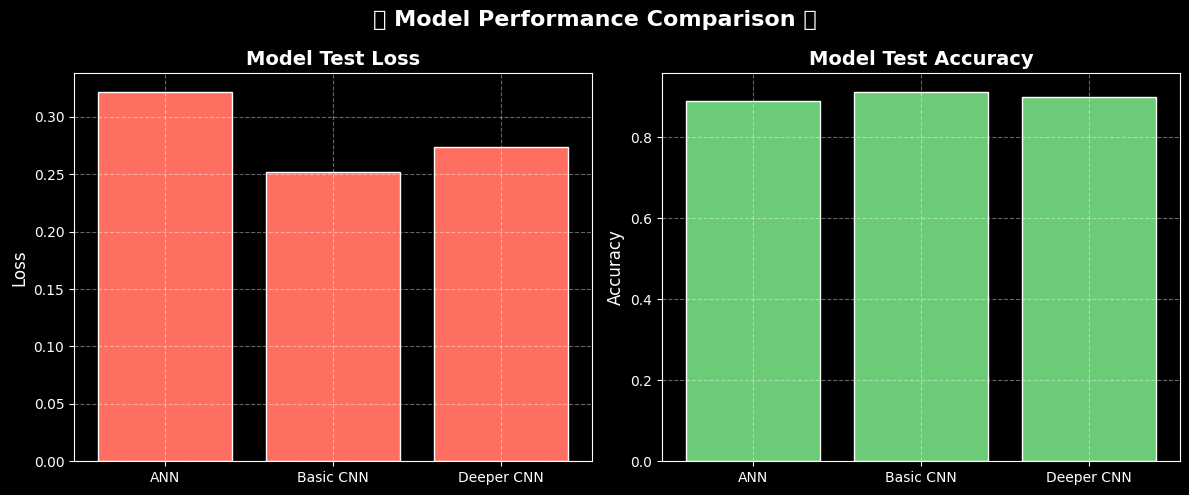

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


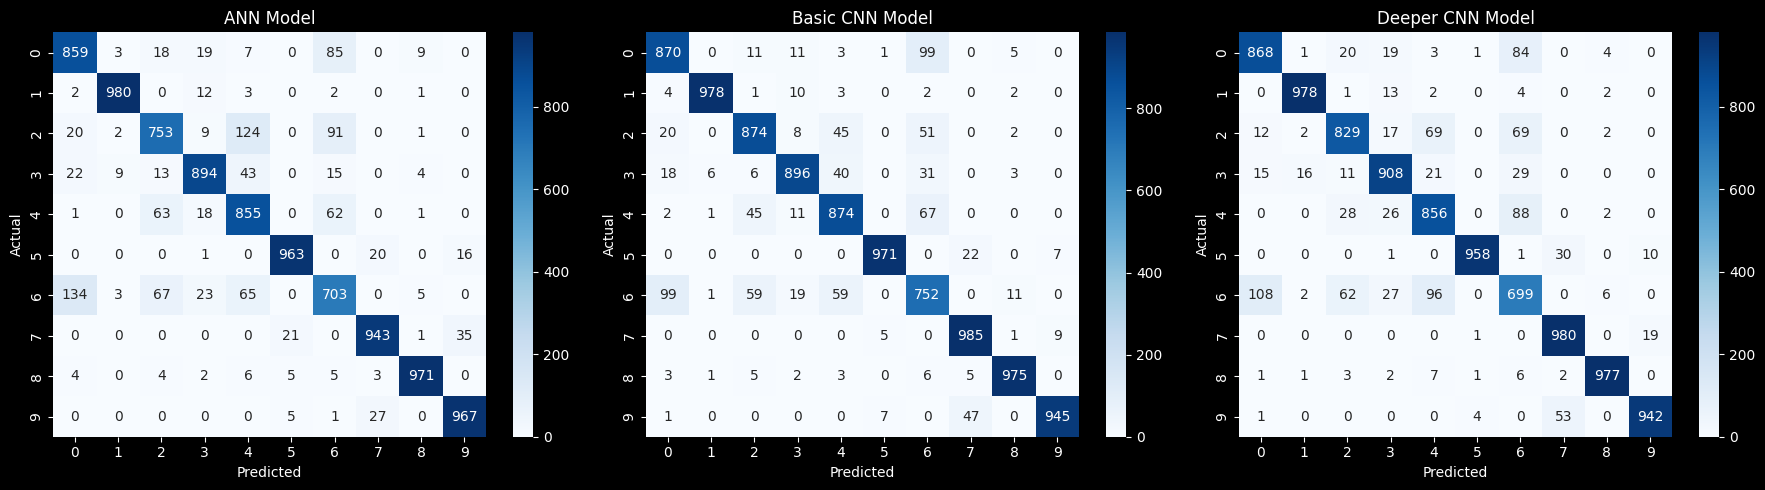

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

#### 4.4) Predictions

This code:
- Uses the trained **Basic CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).  


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


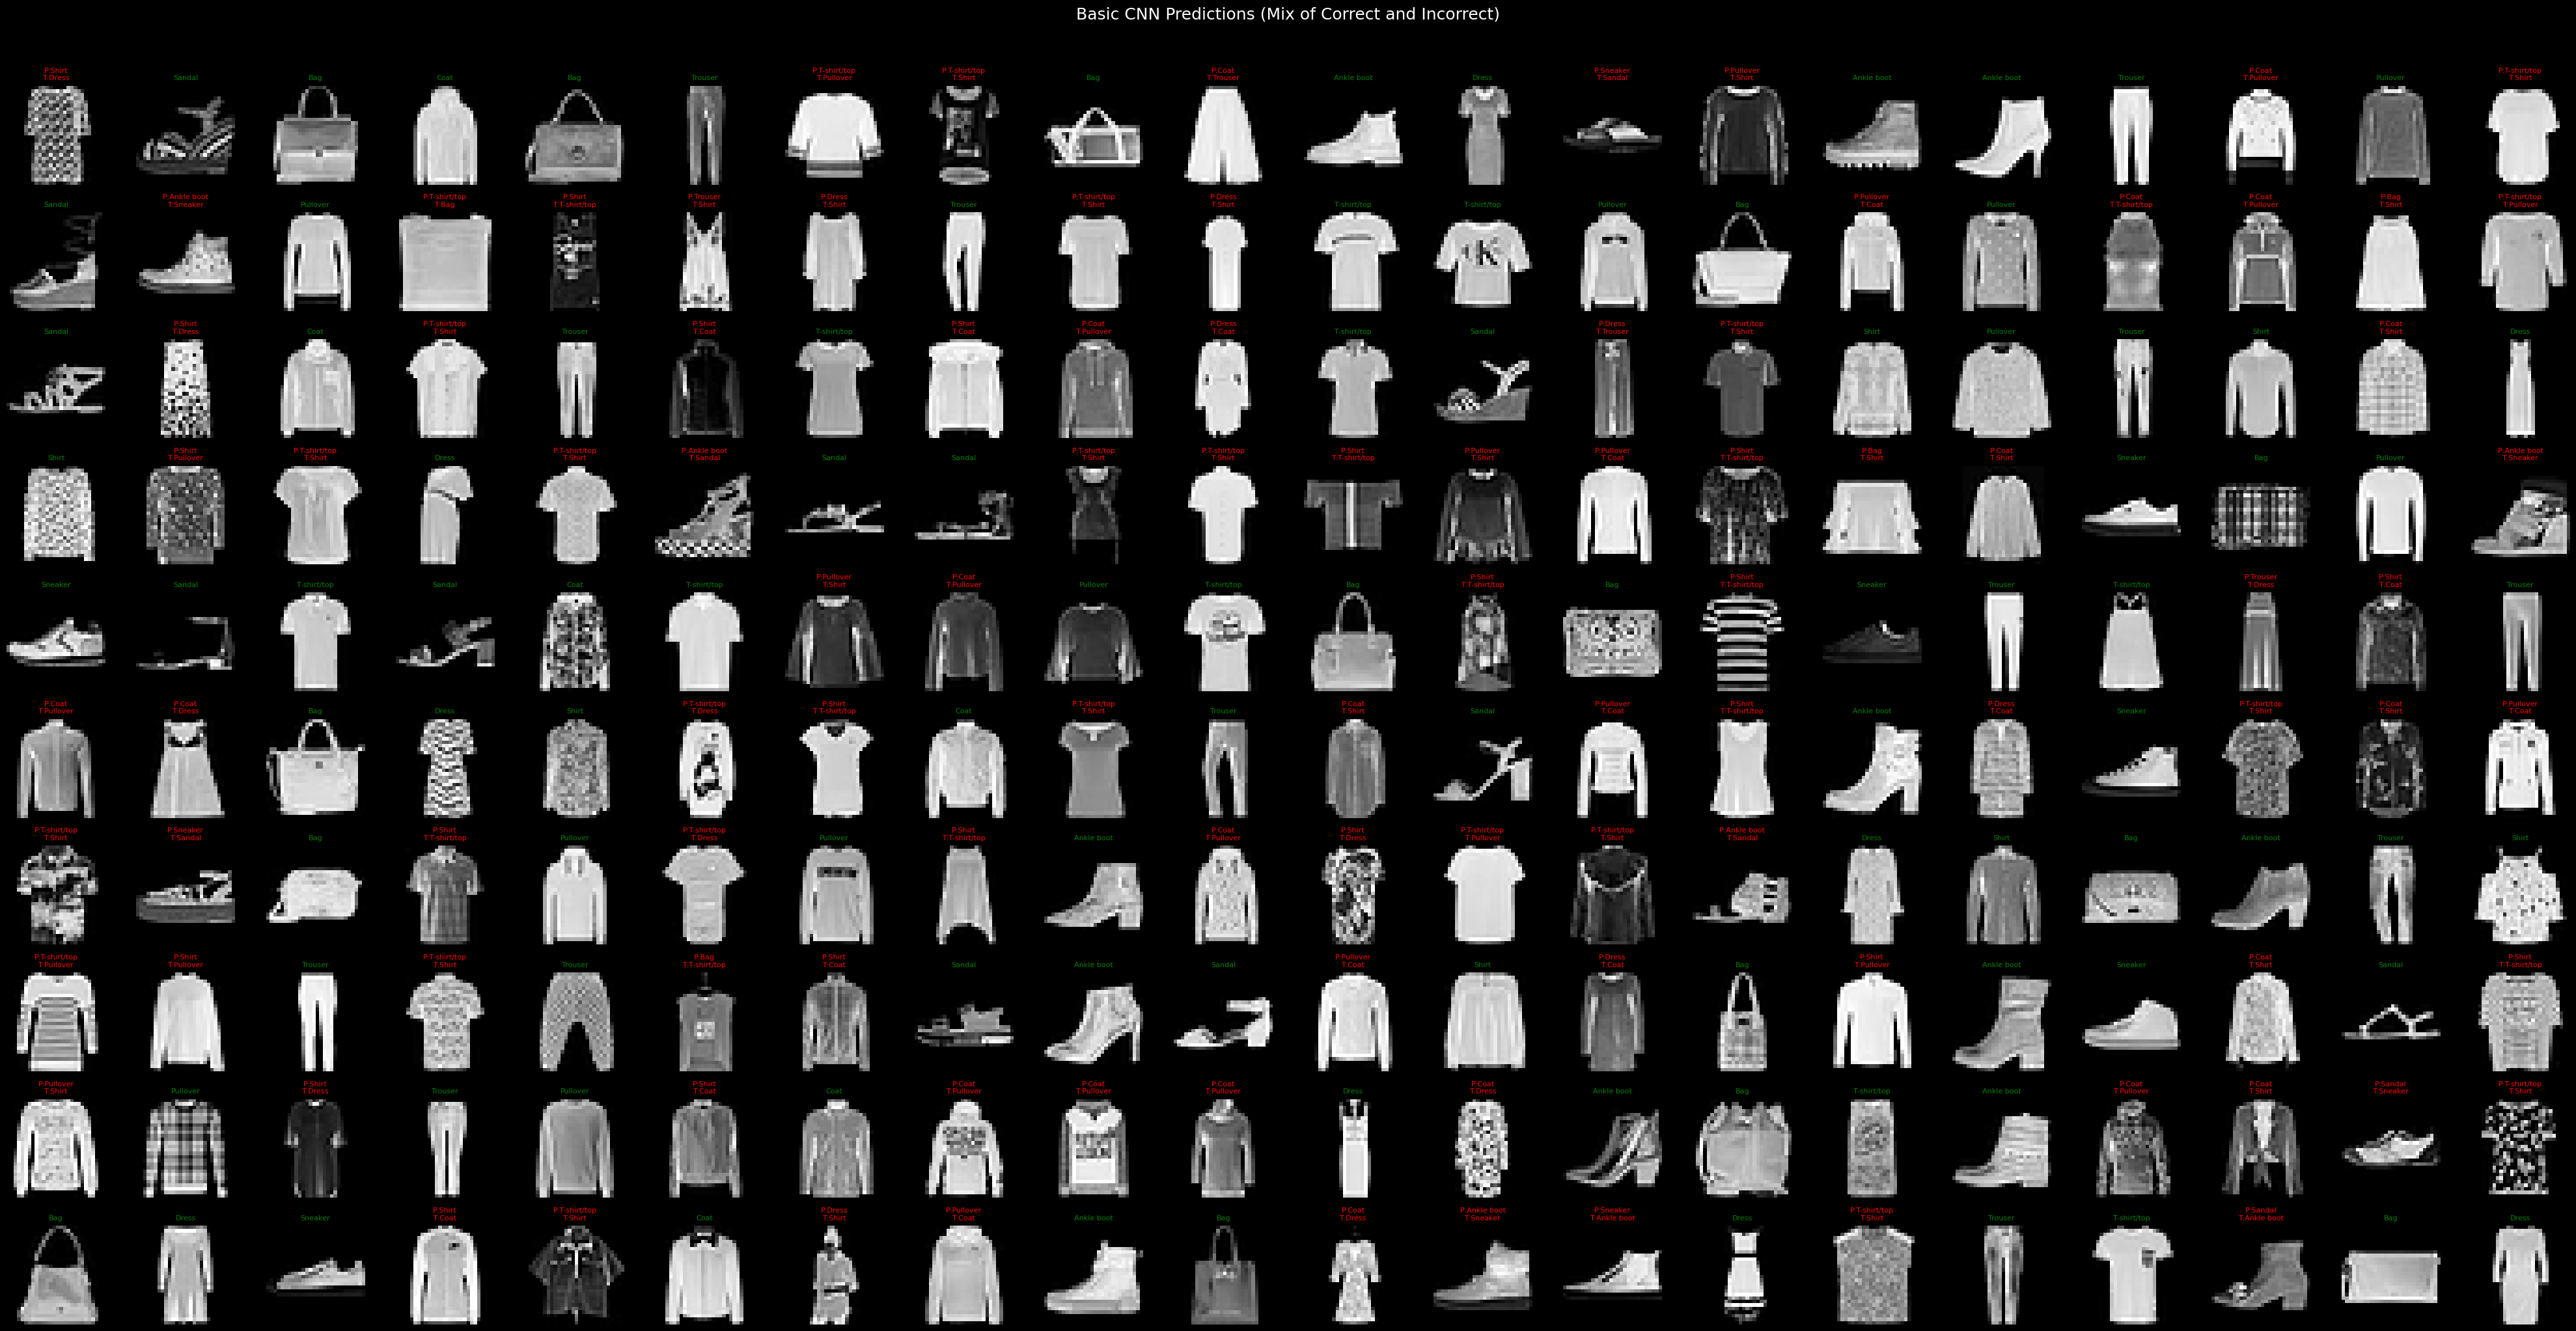

In [ ]:
basic_cnn_predictions = basic_cnn_model.predict(test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(basic_cnn_predicted_labels == test_labels)[0]
incorrectly_classified_indices = np.where(basic_cnn_predicted_labels != test_labels)[0]

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(test_images[idx].reshape(28, 28), cmap='gray')

    pred = class_names[basic_cnn_predicted_labels[idx]]
    true = class_names[test_labels[idx]]

    if basic_cnn_predicted_labels[idx] == test_labels[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (ANN, Basic CNN, and Deeper CNN) for classifying images from the Fashion-MNIST dataset.

**Summary of Work:**

1.  **Data Preparation:** The Fashion-MNIST dataset was loaded, normalized, reshaped, and one-hot encoded, preparing it for use with the different model architectures.
2.  **Model Development:** Three models of increasing complexity were defined: a basic Artificial Neural Network (ANN), a basic Convolutional Neural Network (CNN), and a deeper CNN with additional layers, batch normalization, and dropout.
3.  **Model Training:** Each model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4.  **Model Evaluation:** The trained models were evaluated on the test set. Performance metrics (loss and accuracy) were calculated, and the training history was visualized. Confusion matrices were generated to analyze class-specific performance.
5.  **Prediction Analysis:** Predictions were made using the Basic CNN model, and examples of correctly and incorrectly classified images were visualized to gain insights into the model's strengths and weaknesses.

**Key Findings and Conclusion:**

Based on the evaluation results:

*   The **Basic CNN model** generally achieved the best balance of performance (highest accuracy, lowest loss) on the test set compared to the ANN and Deeper CNN models.
*   The **ANN model** performed reasonably well but was outperformed by both CNN architectures, highlighting the advantage of convolutional layers for image classification tasks.
*   The **Deeper CNN model**, despite its increased complexity, did not consistently outperform the Basic CNN model on this dataset. This could be due to various factors such as the dataset size, the architecture choices, or the regularization applied. For this particular task and dataset, the increased complexity of the deeper model might not have been necessary or could have led to some overfitting despite the regularization techniques.

In conclusion, the Basic CNN model demonstrated superior performance for this Fashion-MNIST classification task, suggesting that a moderate level of complexity with convolutional layers is effective for this dataset. Further tuning of hyperparameters or architectural variations might potentially improve performance across all models, but the current results clearly show the benefits of CNNs over ANNs for image data.

## Assignment: CIFAR-100 Image Classification

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

In [ ]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


### 1. Dataset Setup for CIFAR-100

#### 1.1) Load Dataset

Load the **CIFAR-100** dataset from Keras, splitting it into:  
- `cifar100_train_images`, `cifar100_train_labels` → training set  
- `cifar100_test_images`, `cifar100_test_labels` → test set  

In [ ]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


#### 1.2) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  

In [ ]:
cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0

#### 1.3) One-Hot Encode Labels

Convert class labels (0–99) into **one-hot encoded vectors** with 100 output classes, required for multi-class classification.  

**Example:**  
- Original label: `29`  
- One-hot encoded: `[0, ..., 0, 1, 0, ..., 0]` (1 at index 29)  

In [ ]:
cifar100_train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
cifar100_test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes=100)

#### 1.4) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(50000, 32, 32, 3)`  
- Testing images shape: `(10000, 32, 32, 3)`  
- Training labels shape: `(50000, 100)`  
- Testing labels shape: `(10000, 100)`  

In [ ]:
print("Training images shape:", cifar100_train_images.shape)
print("Testing images shape:", cifar100_test_images.shape)
print("Training labels shape:", cifar100_train_labels_one_hot.shape)
print("Testing labels shape:", cifar100_test_labels_one_hot.shape)

Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing labels shape: (10000, 100)


In [ ]:
cifar100_train_images.shape

(50000, 32, 32, 3)

In [ ]:
cifar100_train_labels[1]

array([29])

### 2. Model Building for CIFAR-100

#### 2.1) Basic ANN Model

-   **Flatten (32×32×3 → 3072)** → 0 params
-   **Dense (256, ReLU)** → 786,688 params
-   **Dense (128, ReLU)** → 32,896 params
-   **Dense (100, Softmax)** → 12,900 params

**Total params:** ~832K

In [ ]:
ann_model_cifar = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

ann_model_cifar.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model_cifar.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,484 (3.18 MB)

 Trainable params: 832,484 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model

-   **Conv2D (32, 3×3) + MaxPool** → 896 params
-   **Conv2D (64, 3×3) + MaxPool** → 18,496 params
-   **Flatten**
-   **Dense (128, ReLU)** → 295,040 params
-   **Dense (100, Softmax)** → 12,900 params

**Total params:** ~327K

In [ ]:
basic_cnn_model_cifar = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])


basic_cnn_model_cifar.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model_cifar.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,332 (1.25 MB)

 Trainable params: 327,332 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model

-   **Conv2D (32, 3×3, same) + BN + MaxPool + Dropout** → 896 + 128 params
-   **Conv2D (64, 3×3, same) + BN + MaxPool + Dropout** → 18,496 + 256 params
-   **Conv2D (128, 3×3, same) + BN + MaxPool + Dropout** → 73,856 + 512 params
-   **Conv2D (256, 3×3, same) + BN + MaxPool + Dropout** → 295,168 + 1024 params
-   **Flatten**
-   **Dense (256, ReLU) + BN + Dropout** → 262,400 + 1024 params
-   **Dense (128, ReLU) + BN + Dropout** → 32,896 + 512 params
-   **Dense (100, Softmax)** → 12,900 params

**Total params:** ~700K

In [ ]:
deeper_cnn_model_cifar = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax')
])

deeper_cnn_model_cifar.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model_cifar.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 700,068 (2.67 MB)

 Trainable params: 698,340 (2.66 MB)

 Non-trainable params: 1,728 (6.75 KB)

### 3. Train Models for CIFAR-100

#### 3.1) Training ANN Model

-   **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.
-   **ModelCheckpoint**: saves best ANN weights (`best_ann_model_cifar_weights.weights.h5`) based on validation loss.
-   **Training**:
    -   Epochs: up to 30 (early stopping controls actual run)
    -   Batch size: 64
    -   Validation on test set
    -   Callbacks: EarlyStopping + ModelCheckpoint

In [89]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
model_checkpoint_ann_cifar = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_cifar_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history_cifar = ann_model_cifar.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann_cifar]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0439 - loss: 4.3536
Epoch 1: val_loss improved from inf to 3.84057, saving model to best_ann_model_cifar_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.0440 - loss: 4.3533 - val_accuracy: 0.1106 - val_loss: 3.8406
Epoch 2/30
767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1245 - loss: 3.7540
Epoch 2: val_loss improved from 3.84057 to 3.65597, saving model to best_ann_model_cifar_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1247 - loss: 3.7531 - val_accuracy: 0.1522 - val_loss: 3.6560
Epoch 3/30
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1566 - loss: 3.5670
Epoch 3: val_loss improved from 3.65597 to 3.53793, saving model to best_ann_model_cifar_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1567 - loss: 3.5669 - val_accuracy: 0.1730 - val_loss: 3.5379
Epoch 4/30
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

#### 3.2) Training Basic CNN Model

-   **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_cifar_weights.weights.h5`) based on validation loss.
-   **Training**:
    -   Epochs: up to 30 (early stopping controls actual run)
    -   Batch size: 64
    -   Validation on test set
    -   Callbacks: EarlyStopping + ModelCheckpoint

In [90]:
model_checkpoint_basic_cnn_cifar = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_cifar_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history_cifar = basic_cnn_model_cifar.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn_cifar]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0774 - loss: 4.1348
Epoch 1: val_loss improved from inf to 3.37013, saving model to best_basic_cnn_model_cifar_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.0774 - loss: 4.1344 - val_accuracy: 0.1973 - val_loss: 3.3701
Epoch 2/30
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2328 - loss: 3.1846
Epoch 2: val_loss improved from 3.37013 to 2.94948, saving model to best_basic_cnn_model_cifar_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2331 - loss: 3.1831 - val_accuracy: 0.2766 - val_loss: 2.9495
Epoch 3/30
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3042 - loss: 2.8038
Epoch 3: val_loss improved from 2.94948 to 2.74681, saving model to best_basic_cnn_model_cifar_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3042 - loss: 2.8035 - val_accuracy: 0.3190 - val_loss: 2.7468
Epoch 4/30
775/782 ━━━━━━

#### 3.3) Training Deeper CNN Model

-   **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_cifar_weights.weights.h5`) based on validation loss.
-   **Training**:
    -   Epochs: up to 50 (early stopping controls actual run)
    -   Batch size: 64
    -   Validation on test set
    -   Callbacks: EarlyStopping + ModelCheckpoint

In [91]:
model_checkpoint_deeper_cnn_cifar = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_cifar_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history_cifar = deeper_cnn_model_cifar.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=50,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn_cifar]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4751 - loss: 1.9170
Epoch 1: val_loss improved from inf to 2.10277, saving model to best_deeper_cnn_model_cifar_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4751 - loss: 1.9170 - val_accuracy: 0.4514 - val_loss: 2.1028
Epoch 2/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4854 - loss: 1.8920
Epoch 2: val_loss did not improve from 2.10277
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4854 - loss: 1.8921 - val_accuracy: 0.4512 - val_loss: 2.1137
Epoch 3/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4837 - loss: 1.8992
Epoch 3: val_loss improved from 2.10277 to 1.89828, saving model to best_deeper_cnn_model_cifar_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4836 - loss: 1.8993 - val_accuracy: 0.4928 - val_loss: 1.8983
Epoch 4/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4821 - loss: 1.8948
Ep

### 4. Model Evaluation for CIFAR-100

#### 4.1) Model Evaluation (Loss and Accuracy)

-   Load the best weights for each trained model.
-   Evaluate each model's performance on the test set using loss and accuracy.
-   Plot the test loss and accuracy for comparison.

/tmp/ipython-input-2923898952.py:42: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.



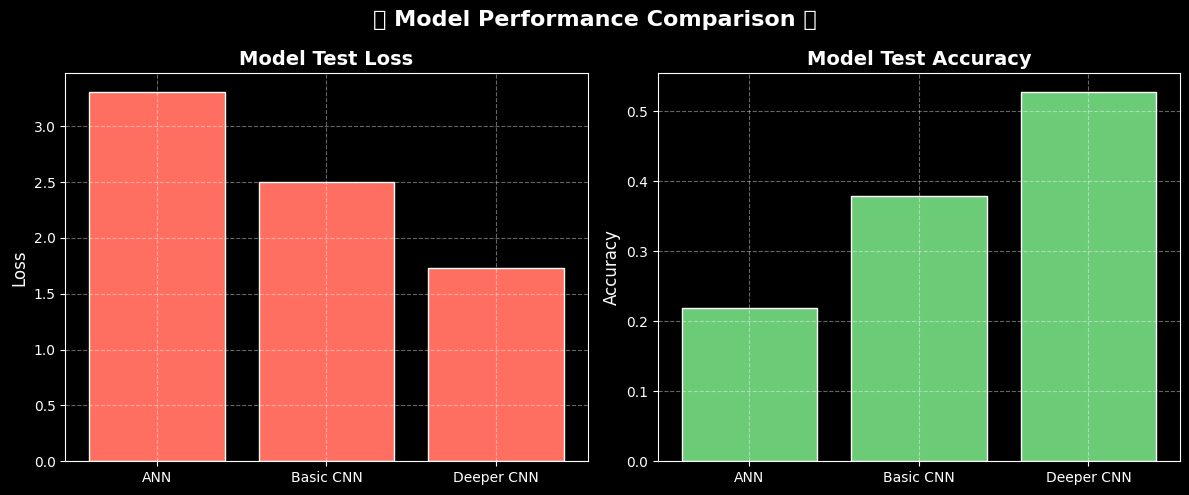

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model_cifar.load_weights('best_ann_model_cifar_weights.weights.h5')
basic_cnn_model_cifar.load_weights('best_basic_cnn_model_cifar_weights.weights.h5')
deeper_cnn_model_cifar.load_weights('best_deeper_cnn_model_cifar_weights.weights.h5')

loss_ann, accuracy_ann = ann_model_cifar.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model_cifar.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model_cifar.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

#### 4.2) Model Evaluation (Confusion Matrix)

- Predict test images for each model.
- Convert one-hot labels to integers.
- Get predicted labels.
- Generate and plot confusion matrices for each model to visualize class-specific performance.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


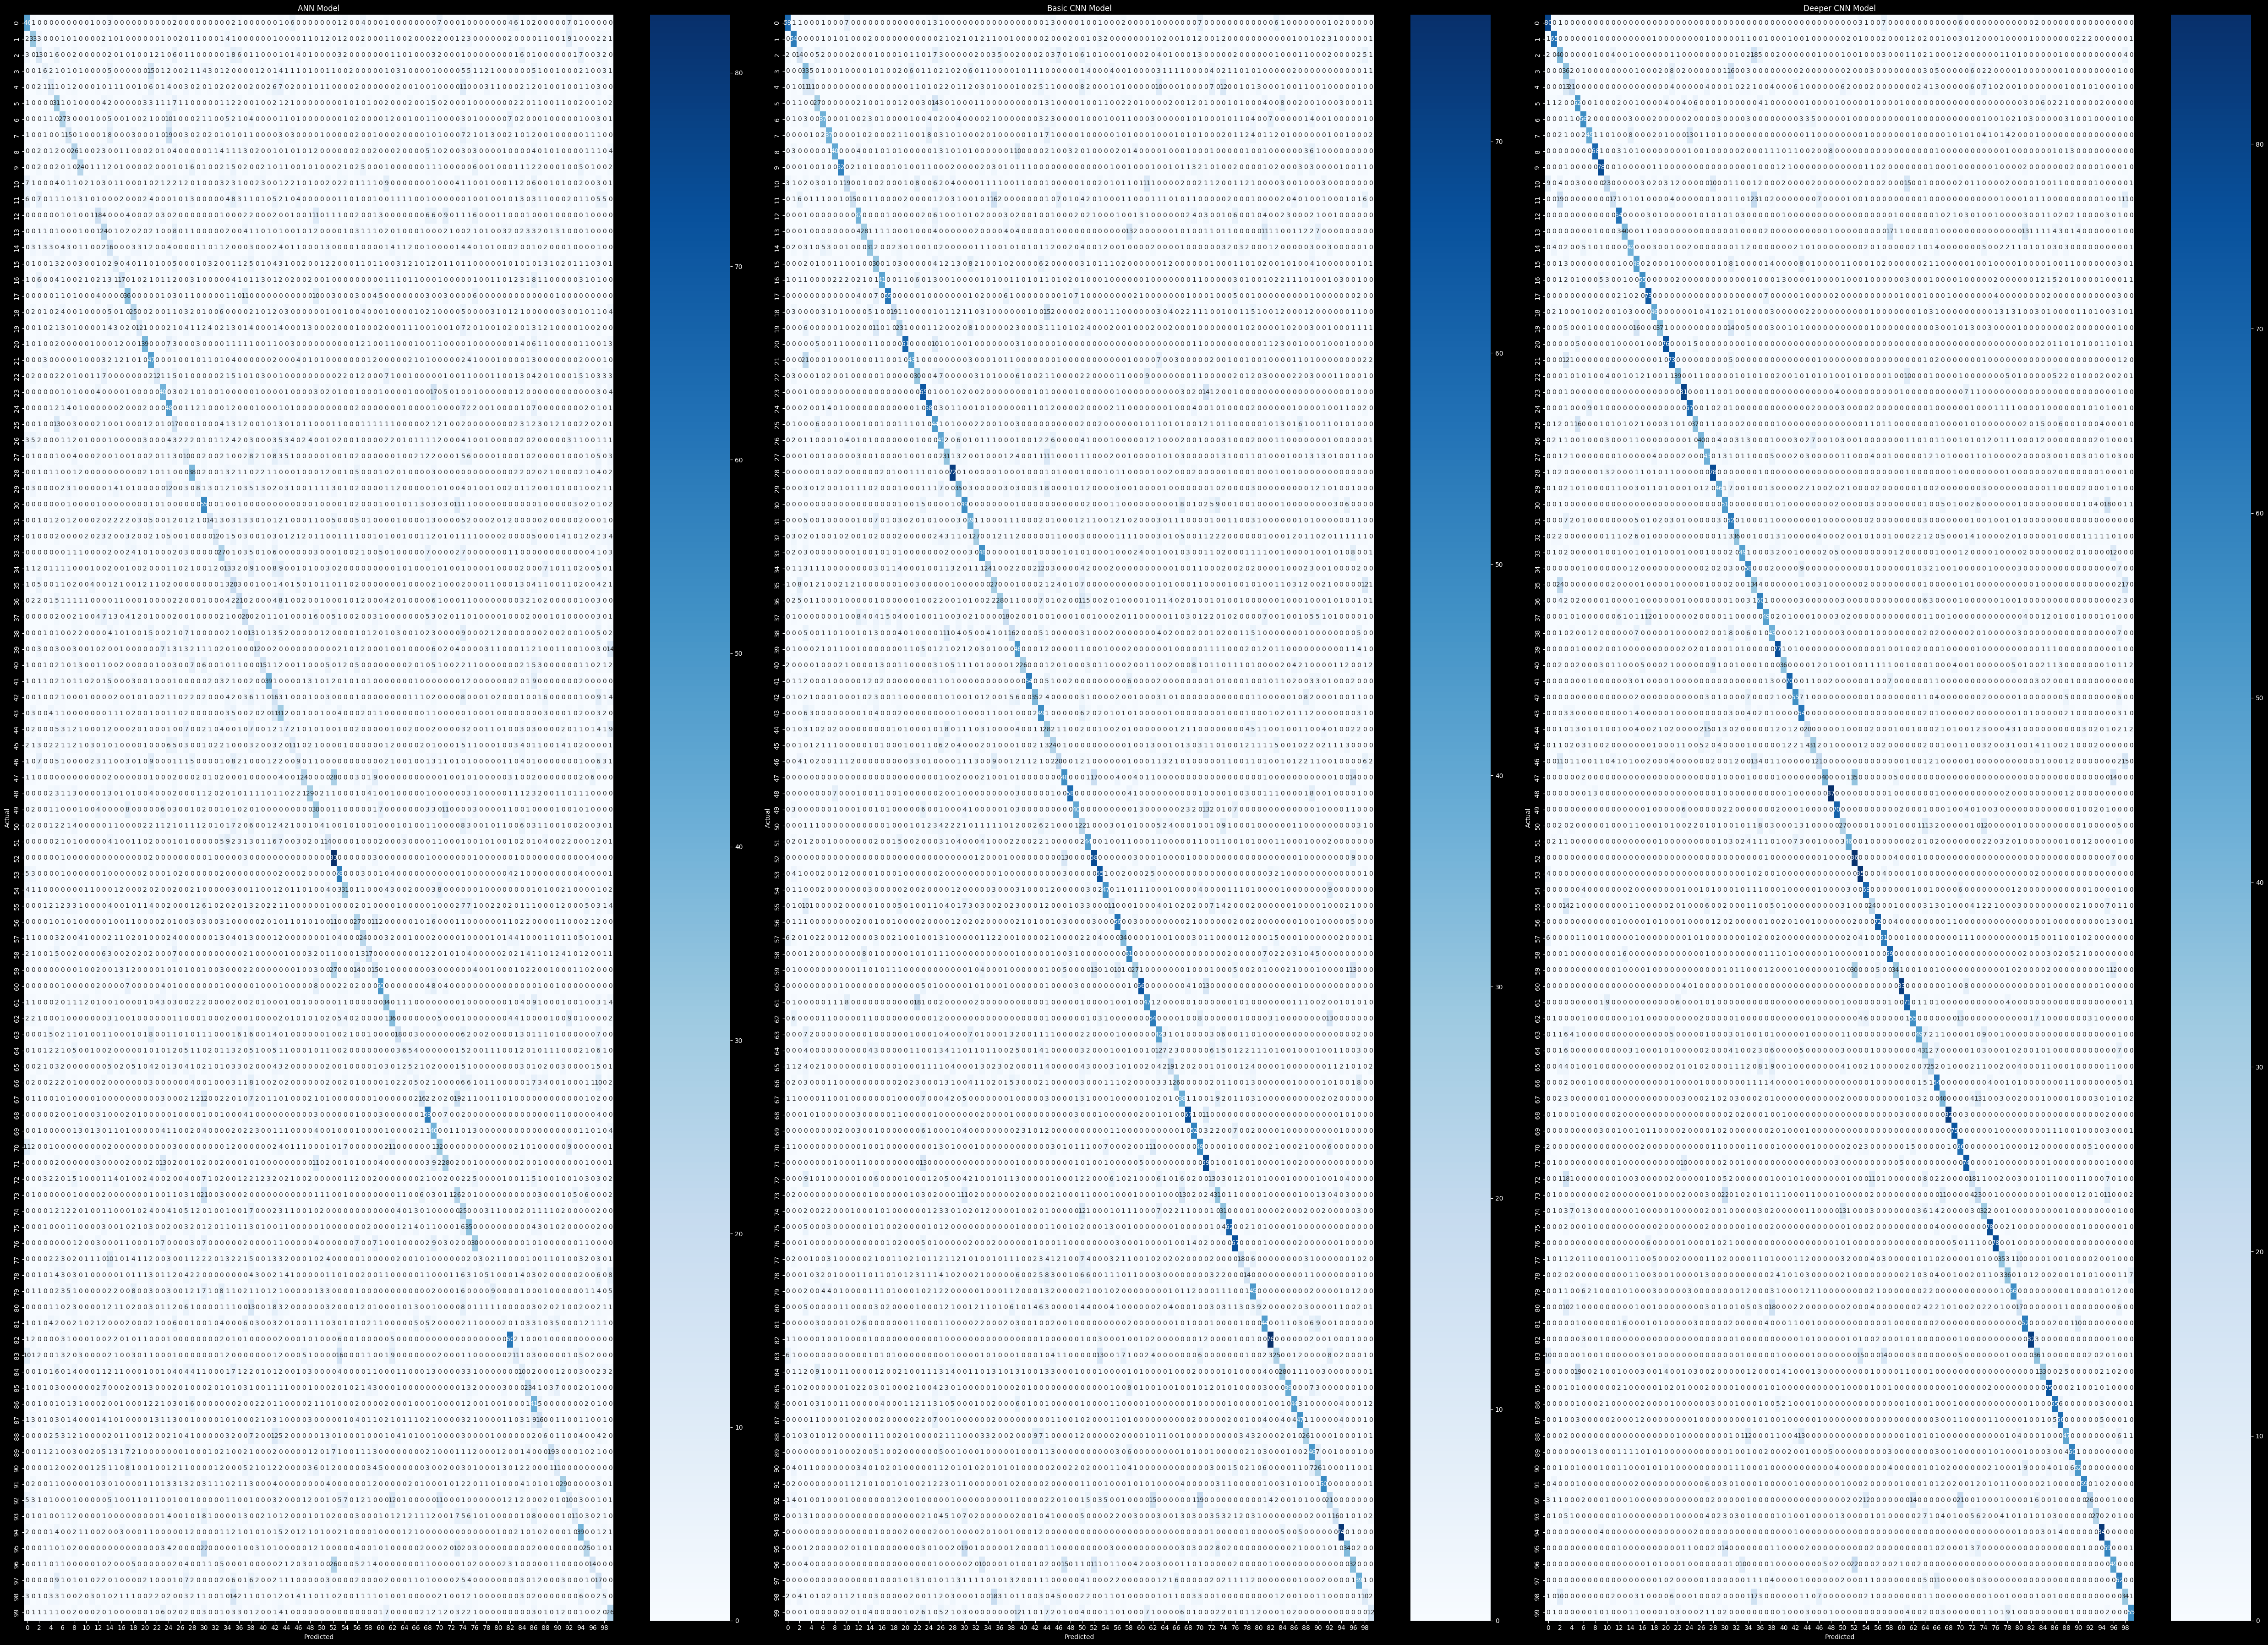

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model_cifar.predict(cifar100_test_images)
basic_cnn_predictions = basic_cnn_model_cifar.predict(cifar100_test_images)
deeper_cnn_predictions = deeper_cnn_model_cifar.predict(cifar100_test_images)

# Convert labels
test_labels_int = np.argmax(cifar100_test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(50, 36))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### 4.3) Model Comparison (Training History)

-   Create a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.
-   Plot training history for each model (accuracy & loss vs. epochs) to compare how models learn and generalize over time.

In [94]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history_cifar),
    "Basic CNN": ("magenta", basic_cnn_history_cifar),
    "Deeper CNN": ("yellow", deeper_cnn_history_cifar)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

### 5. Prediction Analysis for CIFAR-100

#### 5.1) Predictions

This code:
- Uses the trained **Deeper CNN model** (as it performed best on CIFAR-100) to predict on test images.
- Identifies **correctly** and **incorrectly** classified samples.
- Randomly selects a mix of correct and incorrect predictions.
- Displays them in a grid:
    - ✅ Correct predictions → **Green title** (only predicted label).
    - ❌ Incorrect predictions → **Red title** (Predicted vs True label).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


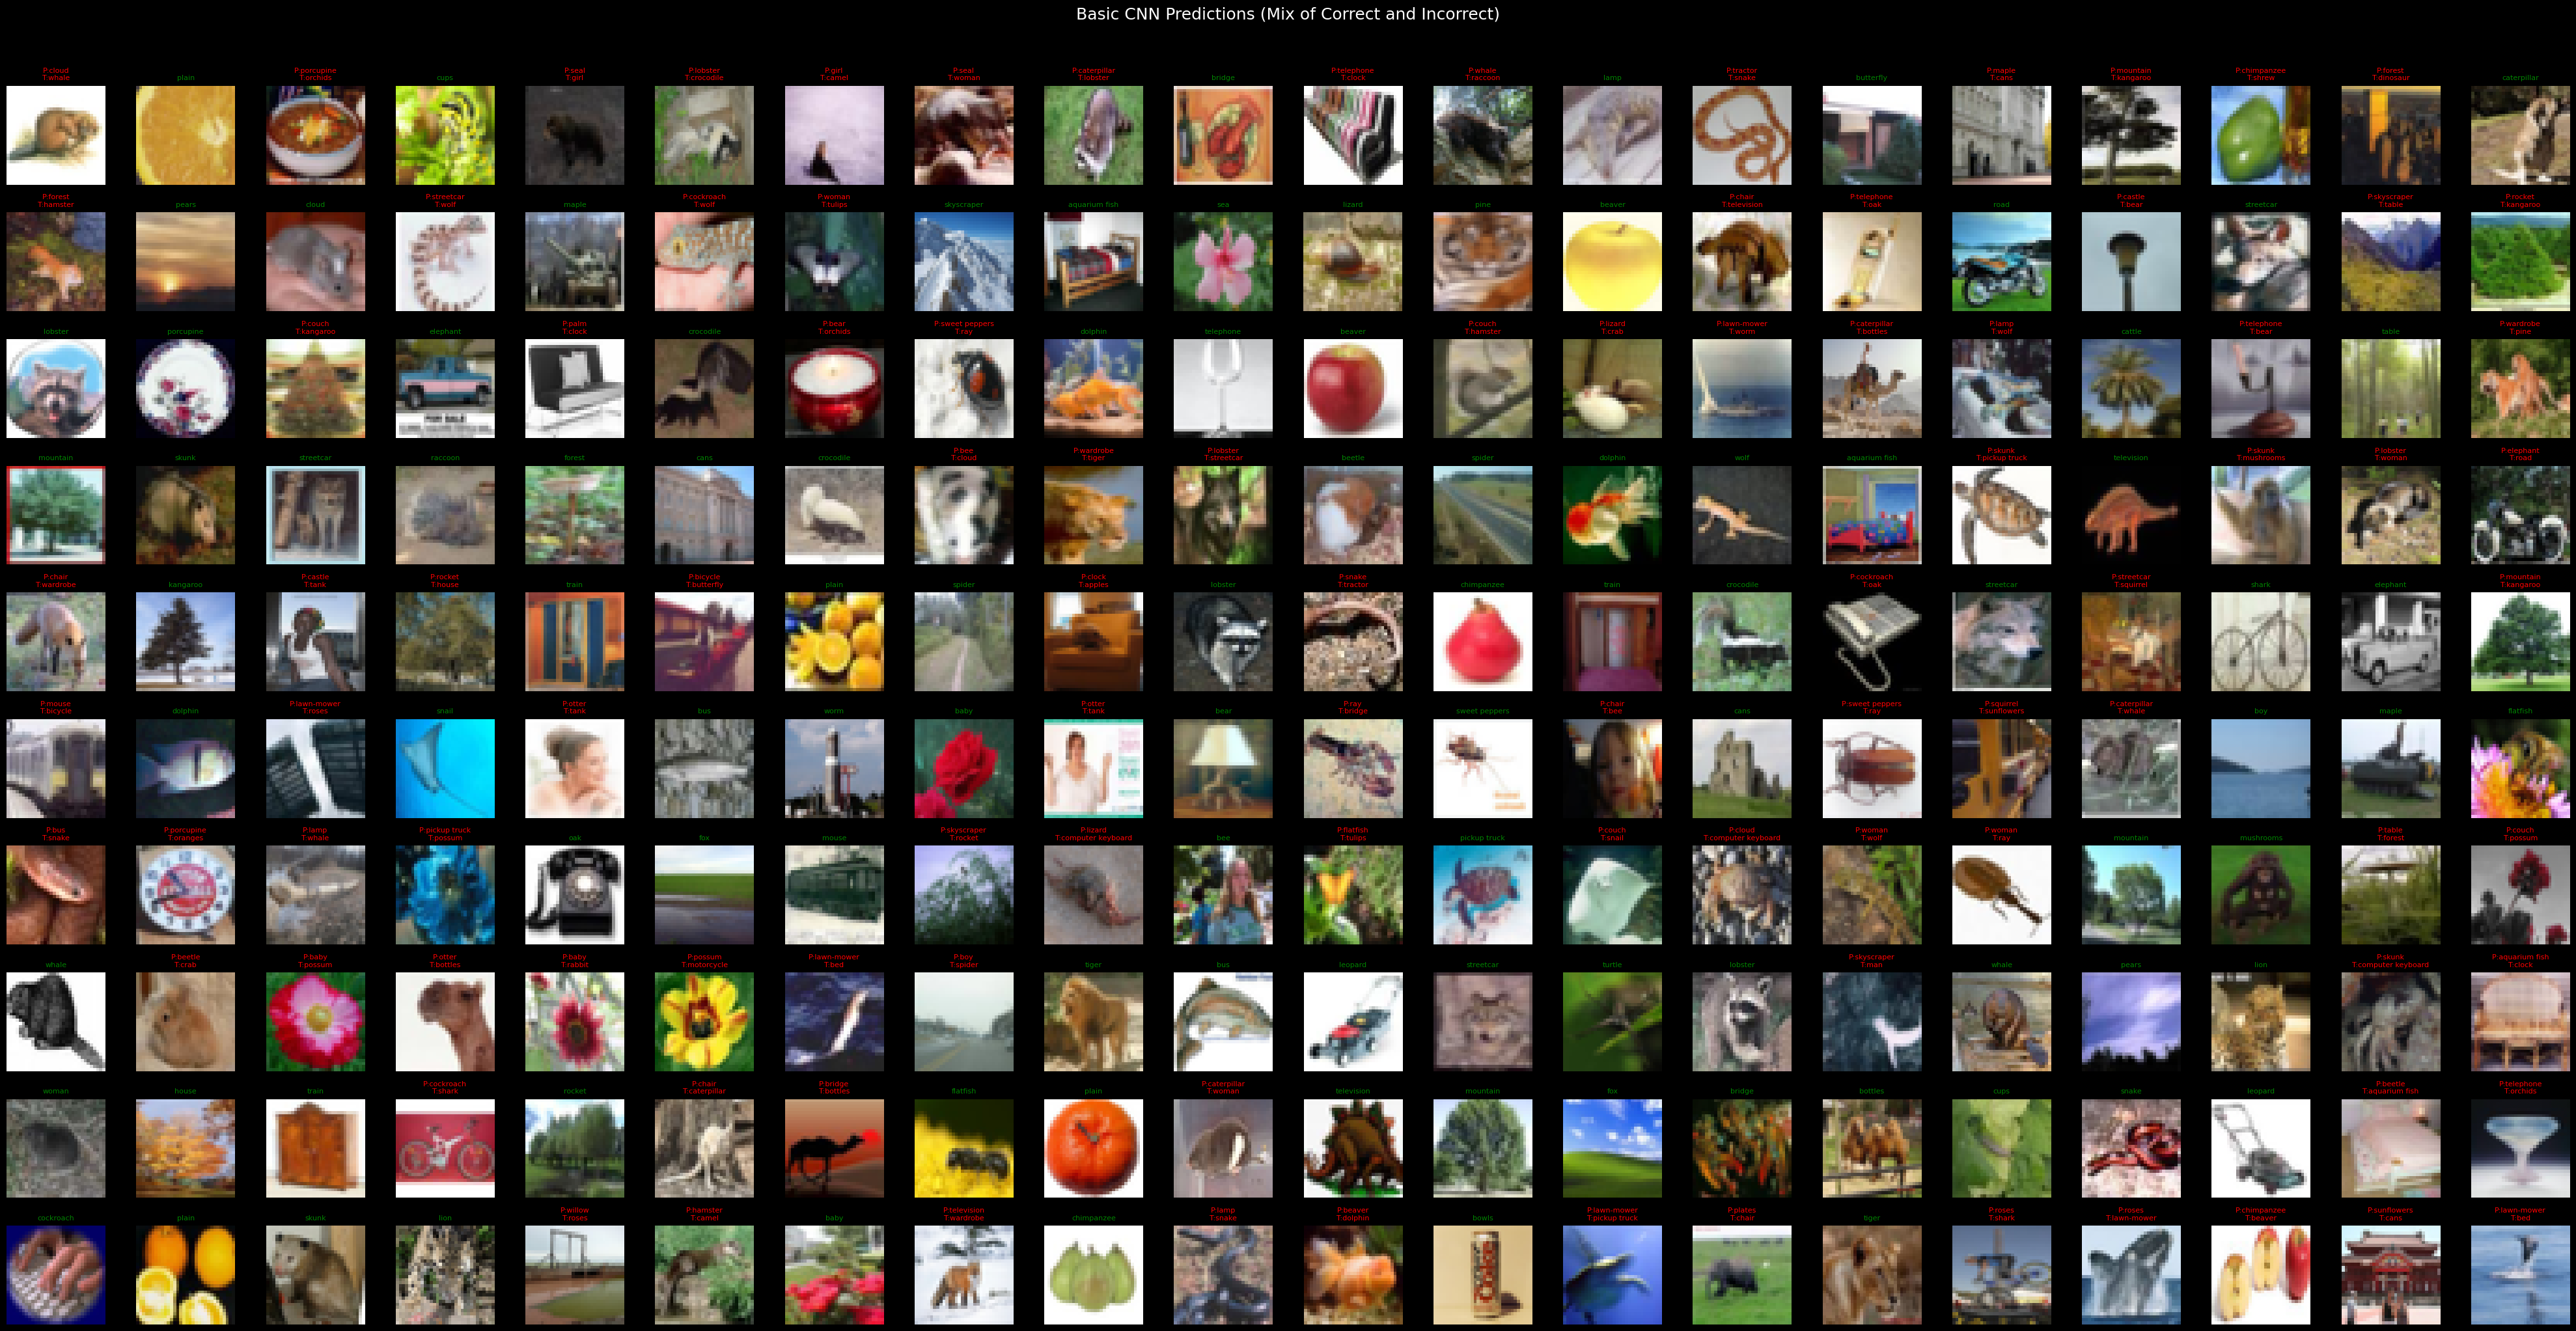

In [95]:
deeper_cnn_predictions = deeper_cnn_model_cifar.predict(cifar100_test_images)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(deeper_cnn_predicted_labels == cifar100_test_labels.flatten())[0]
incorrectly_classified_indices = np.where(deeper_cnn_predicted_labels != cifar100_test_labels.flatten())[0]

# Define class names for CIFAR-100
class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
               'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
               'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
               'bottles', 'bowls', 'cans', 'cups', 'plates',
               'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
               'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
               'bed', 'chair', 'couch', 'table', 'wardrobe',
               'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
               'bear', 'leopard', 'lion', 'tiger', 'wolf',
               'bridge', 'castle', 'house', 'road', 'skyscraper',
               'cloud', 'forest', 'mountain', 'plain', 'sea',
               'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
               'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
               'crab', 'lobster', 'snail', 'spider', 'worm',
               'baby', 'boy', 'girl', 'man', 'woman',
               'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
               'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
               'maple', 'oak', 'palm', 'pine', 'willow',
               'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
               'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(cifar100_test_images[idx])

    pred = class_names[deeper_cnn_predicted_labels[idx]]
    true = class_names[cifar100_test_labels[idx][0]]

    if deeper_cnn_predicted_labels[idx] == cifar100_test_labels[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## Project Summary and Conclusion for CIFAR-100

Summarize the findings and conclusions from training and evaluating the models on the CIFAR-100 dataset. Discuss how the performance compares to the Fashion-MNIST project and the impact of model complexity on this more challenging dataset.